In [16]:
import numpy as np
import matplotlib.pyplot as plt

import math
import os

direction='in'
import matplotlib as mpl
import matplotlib.patches as mpatches
from matplotlib import rc
mpl.rcParams.update({
    'font.family' : 'Arial', #STIXGeneral
    'mathtext.fontset' : 'cm', #stix
    'xtick.direction' : direction ,
    'ytick.direction' : direction ,
    'xtick.labelsize' : 17.5 ,
    'xtick.top' : True ,
    'xtick.major.width' : 1.5,
    'xtick.major.size' : 6,
    'ytick.labelsize' : 17.5 ,
    'ytick.right' : True ,
    'ytick.major.width' : 1.5,
    'ytick.major.size' : 6,
    'axes.labelsize' : 18,
    'legend.frameon' : False,
    'legend.fontsize' : 13,
    'legend.handlelength' : 2,
    'savefig.dpi' : 600, 
    'savefig.bbox' : 'tight',
    'axes.linewidth' : 1.5,
})

import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import seaborn as sns

In [2]:
def is_non_zero_file(fpath, verb=False):
    if verb: 
        if os.path.isfile(fpath)==False: print('No', fpath)
    return os.path.isfile(fpath) and os.path.getsize(fpath) > 0
def smooth(a, b):
    if b==0: return a
    else:
        a_ = np.zeros(len(a)-b)
        for i in range(b):
            a_ += a[b-i:len(a)-i]
        return a_/b

(5, 8, 10, 13, 17)
(5, 8, 10, 13, 17)
(5, 8, 10, 13, 17)


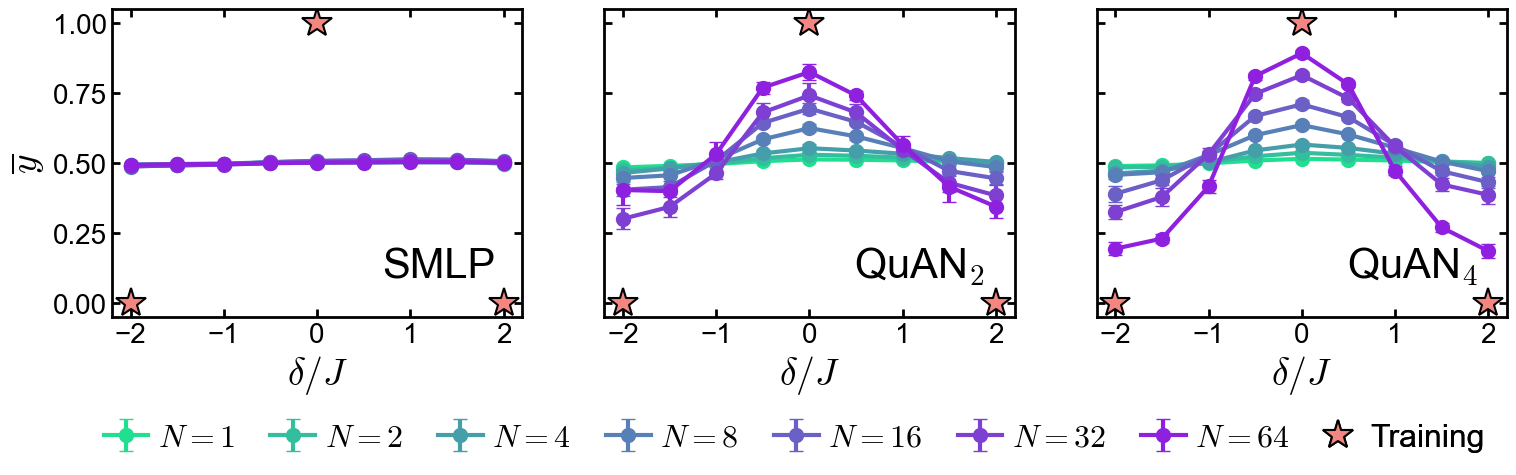

In [403]:
d2 = 4
channel=8
kernel=2
mpl.rcParams['axes.linewidth'] = 2

generated = 'expn8'
for i,tested in [(1,'expn8')]:
    if i!=1: continue
    fig, ax = plt.subplots(1,3, figsize=(18, 4), sharey='row')
    if generated=='simn8': d22 = 6
    else: d22 = 4; tr_p = [0,4,8]
    
    color_r = ['#20DF90', '#33BF9D', '#459FAA', '#5880B8', '#6B60C5', '#7D40D2', '#9020DF']
    
    for j, mn, channel in [(0,'c00',8), (1,'c11',8), (2,'c21',7)]:
        filename = f'boson_{mn}_basis0_0vs{d22}_ch{channel}ker{kernel}_{generated}_phasediagram.npz'
        data = np.load(f'Data_out/g2_saved_models_hcbh/{filename}')
        phase_diagram_out = data['arr0']
        print(phase_diagram_out.shape)
        if tested=='simn8': 
            x = [-14.032,-11.646,-9.356,-7.015,-4.678,-2.339,0.0,2.339,4.678,7.015,9.356,11.646,14.032]
        else: 
            x = (np.arange(d2*2+1)-d2)/2

        for k, setsize in enumerate(2**np.arange(7)[:]):
            howmanyruns=10
            mask = np.ones((howmanyruns,9,17)).astype(bool); mask[:,tr_p,:] = 0
            for run in range(howmanyruns):
                c_p_name = f'Data_out/g2_saved_models_hcbh/boson_{mn}_0vs{d22}_run_{run}/'\
                        +f'p_4x4_n8d0vsn8d{d22}-{mn}_set{setsize}_h16nh4_ch{channel}ker{kernel}st1.txt'
                if not is_non_zero_file(c_p_name): mask[run,:,:] = 0; continue
                c_p = np.loadtxt(c_p_name, dtype = 'float64').astype(int)[12:]
                mask[run,:,c_p] = 1
            y = np.ma.array(phase_diagram_out[i,k,:howmanyruns,0:-4,:], mask=~mask).mean(axis=2)
            ax[j].errorbar(x, y.mean(axis=0), yerr = y.std(axis=0)/2,\
                         fmt='.-', lw=3, ms=20, capsize=5, c=color_r[k], label=fr'$N={setsize}$')
        if tested=='simn8':
            ax[j].set_xlabel(r'$E$', fontsize=25)
        else:
            ax[j].set_xlabel(r'$\delta/J$', fontsize=27)
            
        ax[j].set_ylim(-0.05, 1.05)
        ax[j].set_xlim(-2*1.1, 2*1.1)
        ax[j].tick_params(axis='x', labelsize=20)
        ax[j].set_xticks([-2,-1,0,1,2]);
        ax[j].xaxis.set_tick_params(width=2)
        ax[j].yaxis.set_tick_params(width=2)
        
        ax[j].plot(0, 1, '*', mew=1.5, mec='k', mfc='#f38681', ms=22, label='')
        ax[j].plot(-2, 0, '*', mew=1.5, mec='k', mfc='#f38681', ms=22)
        ax[j].plot(2, 0, '*', mew=1.5, mec='k', mfc='#f38681', ms=22, label='Training')

    handles, labels = ax[2].get_legend_handles_labels()
    order = [1,2,3,4,5,6,7]
    l1 = plt.legend([handles[i] for i in order],[labels[i] for i in order], ncol=7, loc='upper left',\
                    fontsize=23, handletextpad=0.3, handlelength =1.4, columnspacing=1.1, \
                    bbox_to_anchor=(-2.53+0.04,-0.25))
    plt.gca().add_artist(l1)
    l2 = plt.legend([handles[i] for i in [0]],[labels[i] for i in [0]], ncol=2, loc='upper left',\
                    fontsize=23, handletextpad=0, columnspacing=-1.3, bbox_to_anchor=(0.4+0.04,-0.25))
    plt.gca().add_artist(l2)
        
    ax[0].tick_params(axis='y', labelsize=20)
    ax[0].set_yticks([0,0.25,0.5,0.75,1]); 
    ax[0].set_ylabel(r'$\overline{y}$', fontsize=27)
    ax[0].text(0.7, 0.09, 'SMLP', fontsize=30)
    ax[1].text(0.48, 0.09, r'QuAN$_2$', fontsize=30)
    ax[2].text(0.48, 0.09, r'QuAN$_4$', fontsize=30)
    
    plt.savefig('fig2d.png', dpi=300, bbox_inches='tight')

(5, 8, 10, 13, 17)
(5, 8, 10, 13, 17)
(5, 8, 10, 13, 17)
(5, 8, 10, 13, 17)
(5, 8, 10, 13, 17)
(5, 8, 10, 13, 17)
(5, 8, 10, 13, 17)
(5, 8, 10, 13, 17)


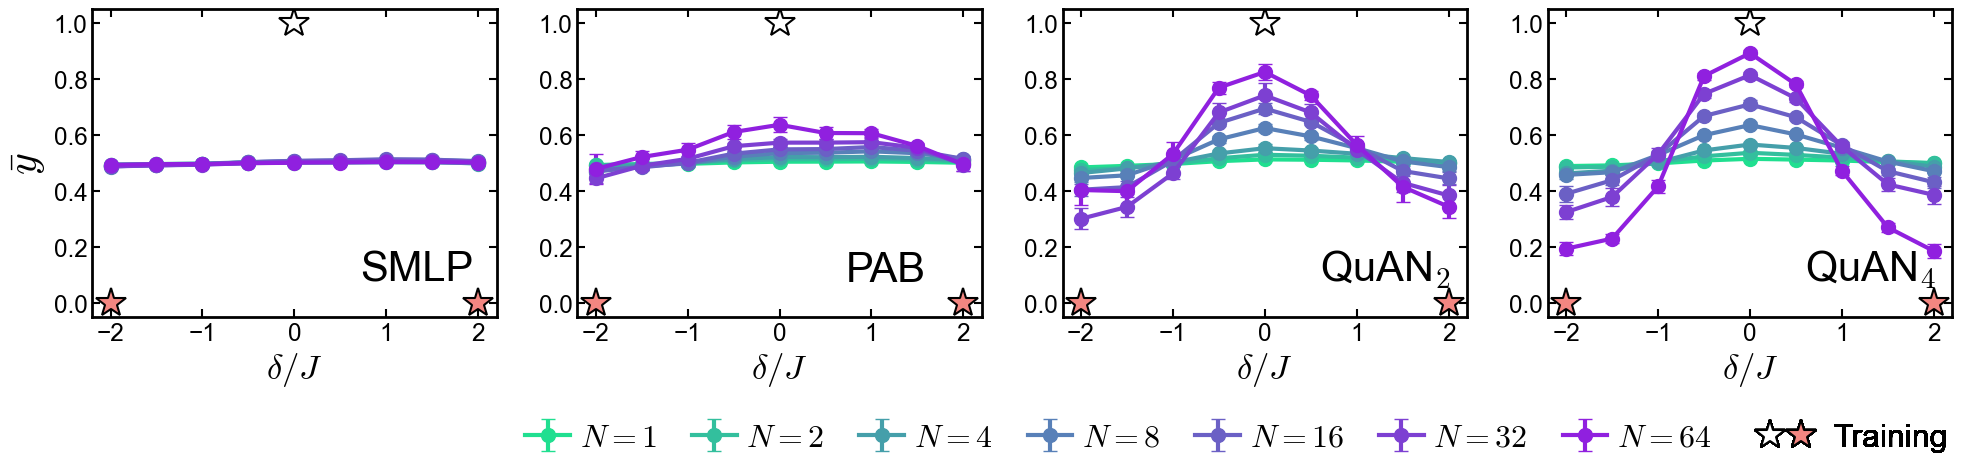

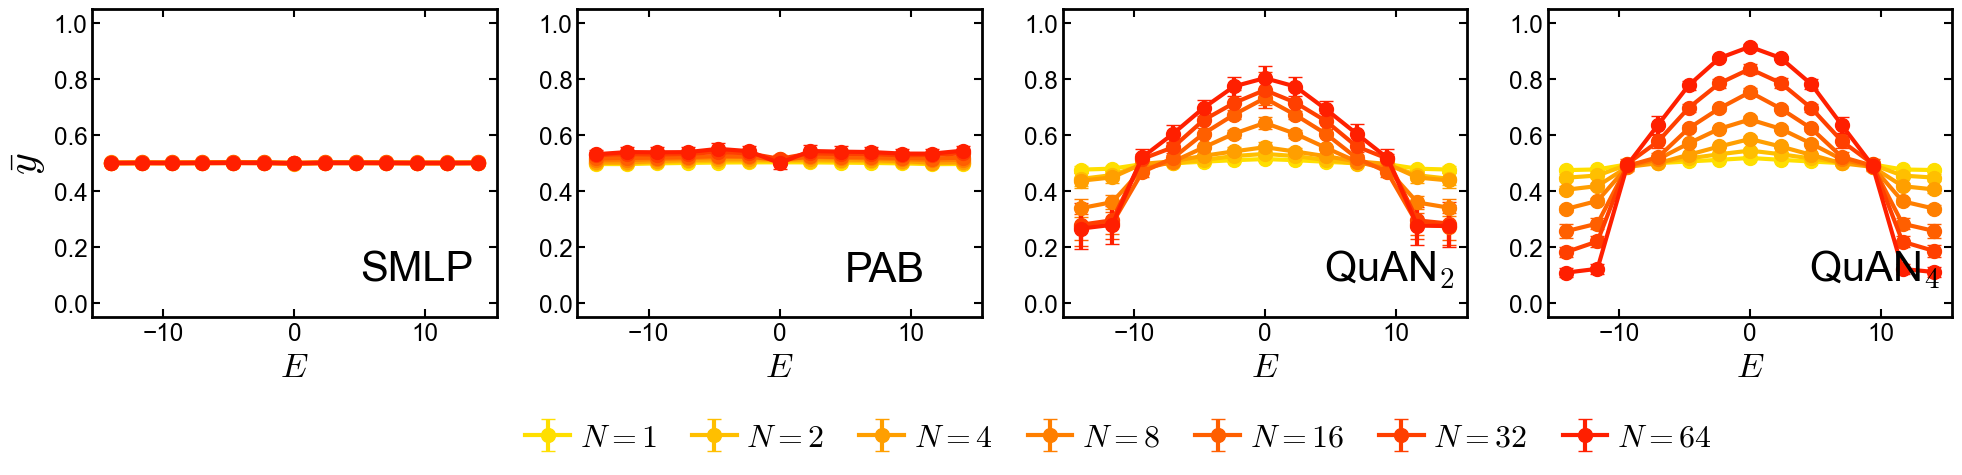

In [398]:
d2 = 4
kernel=2

generated = 'expn8'
for i,tested in [(1,'expn8')]:
    fig, ax = plt.subplots(1,4, figsize=(24, 4))
    if generated=='simn8': d22 = 6
    else: d22 = 4
    if tested=='expn8':
        color_r = ['#20DF90', '#33BF9D', '#459FAA', '#5880B8', '#6B60C5', '#7D40D2', '#9020DF']
    else:
        color_r = sns.color_palette("autumn_r", 7)
    
    for j, mn in enumerate(['c21', 'c11', 'c01', 'c00'][::-1]):
        channel=8
        if mn=='c21': channel=7
        filename = f'boson_{mn}_basis0_0vs{d22}_ch{channel}ker{kernel}_{generated}_phasediagram.npz'
        data = np.load(f'Data_out/g2_saved_models_hcbh/{filename}')
        phase_diagram_out = data['arr0']
        print(phase_diagram_out.shape)
        if tested=='simn8': 
            x = [-14.032,-11.646,-9.356,-7.015,-4.678,-2.339,0.0,2.339,4.678,7.015,9.356,11.646,14.032]
        else: 
            x = (np.arange(d2*2+1)-d2)/2

        for k, setsize in enumerate(2**np.arange(7)[:]):
            if tested=='simn8':
                y = phase_diagram_out[i, k, :10, :, :].mean(axis=2)
                ax[j].errorbar(x, y.mean(axis=0), yerr = y.std(axis=0)/2,\
                             fmt='.-', lw=3, ms=20, capsize=5,c=color_r[k], label=fr'$N={setsize}$')
                
            else:
                l2 = plt.legend([handles[i] for i in [0,1]],[labels[i] for i in [0,1]], ncol=2, loc='upper left',\
                                fontsize=23, handletextpad=0, columnspacing=-1.3, bbox_to_anchor=(0.4,-0.25))
                plt.gca().add_artist(l2)
                
                mask = np.ones((10,9,17)).astype(bool)
                mask[:,tr_p,:] = 0
                for run in range(10):
                    c_p_name = f'Data_out/g2_saved_models_hcbh/boson_{mn}_0vs{d22}_run_{run}/'\
                            +f'p_4x4_n8d0vsn8d{d22}-{mn}_set{setsize}_h16nh4_ch{channel}ker{kernel}st1.txt'
                    c_p = np.loadtxt(c_p_name, dtype = 'float64').astype(int)[12:]
                    mask[run,:,c_p] = 1
                y = np.ma.array(phase_diagram_out[i,k,:10,0:-4,:], mask=~mask).mean(axis=2)
                ax[j].errorbar(x, y.mean(axis=0), yerr = y.std(axis=0)/2,\
                             fmt='.-', lw=3, ms=20, capsize=5, c=color_r[k], label=fr'$N={setsize}$')

        
        if tested=='simn8':
            ax[j].set_xlabel(r'$E$', fontsize=25)
        else:
            ax[j].set_xlabel(r'$\delta/J$', fontsize=25)
            ax[j].plot(0, 1, '*', mew=1.5, mec='k', mfc='w', ms=22, label=' ') 
            ax[j].plot(-2, 0, '*', mew=1.5, mec='k', mfc='#f38681', ms=22)
            ax[j].plot(2, 0, '*', mew=1.5, mec='k', mfc='#f38681', ms=22, label='Training')
        ax[j].set_ylim(-0.05, 1.05)
        ax[j].set_xlim(-np.max(x)*1.1, np.max(x)*1.1)
        
    if tested=='expn8':
        handles, labels = ax[2].get_legend_handles_labels()
        order = [2,3,4,5,6,7,8]
        l1 = plt.legend([handles[i] for i in order],[labels[i] for i in order], ncol=7, loc='upper left',\
                        fontsize=23, handletextpad=0.3, handlelength =1.4, columnspacing=1.1, \
                        bbox_to_anchor=(-2.6,-0.25))
        l2 = plt.legend([handles[i] for i in [0,1]],[labels[i] for i in [0,1]], ncol=2, loc='upper left',\
                    fontsize=23, handletextpad=0, columnspacing=-1.3, bbox_to_anchor=(0.4,-0.25))
        plt.gca().add_artist(l1)
        plt.gca().add_artist(l2)
        ax[0].text(0.72, 0.08, 'SMLP', fontsize=30)
        ax[1].text(0.72, 0.08, r'PAB', fontsize=30)
        ax[2].text(0.6, 0.08, r'QuAN$_2$', fontsize=30)
        ax[3].text(0.6, 0.08, r'QuAN$_4$', fontsize=30)

    else:
        plt.legend(ncol=7, loc='upper left',\
                    fontsize=23, handletextpad=0.3, handlelength =1.4, columnspacing=1.1, bbox_to_anchor=(-2.6,-0.25))
        
        ax[0].text(5, 0.08, 'SMLP', fontsize=30)
        ax[1].text(5, 0.08, r'PAB', fontsize=30)
        ax[2].text(4.5, 0.08, r'QuAN$_2$', fontsize=30)
        ax[3].text(4.5, 0.08, r'QuAN$_4$', fontsize=30)
    ax[0].set_ylabel(r'$\bar{y}$', fontsize=30)
    plt.savefig(f'fig_sup_C_{tested[:-2]}.png', dpi=300, bbox_inches='tight')

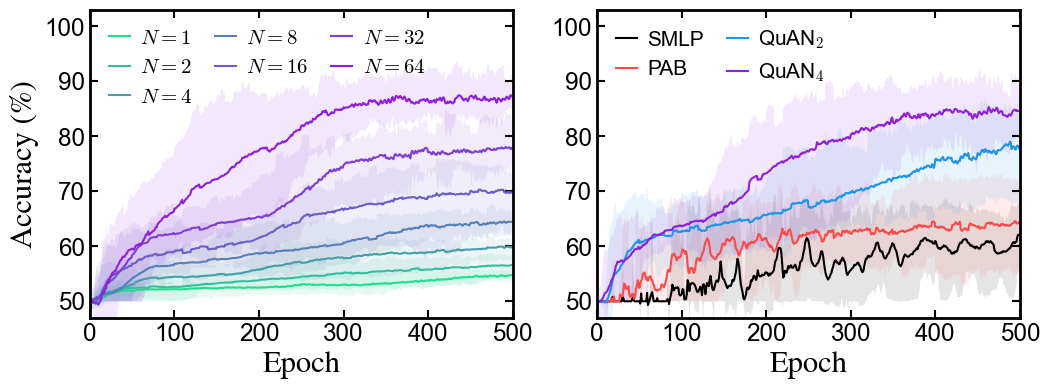

In [391]:
modeldict = {'c21':r'QuAN$_4$', 'c11':r'QuAN$_2$', 'c01':'PAB', 'c00':'SMLP'}
d2 = 4
kernel=2
b_sm = 0

fig, ax = plt.subplots(1,2, figsize=(12, 4))
mn = 'c21'; channel=7
color_r = ['#20DF90', '#33BF9D', '#459FAA', '#5880B8', '#6B60C5', '#7D40D2', '#9020DF']
for k,setsize in enumerate(2**np.arange(7)):
    ac_curve = np.zeros((10, 500)); ac_curve[:] = np.nan
    for run in range(10):
        filename = f'Data_out/g2_saved_models_hcbh/boson_{mn}_0vs{d2}_run_{run}/' +\
                    f'log_4x4_n8d0vsn8d{d2}-{mn}_set{setsize}_h16nh4_ch{channel}ker{kernel}st1.txt'
        if not is_non_zero_file(filename): continue
        _,_,ac_tr,ac_ts,_,_ = np.loadtxt(filename, unpack=True)
        ac_curve[run, :500] = ac_ts[:500]
    ax[0].plot(smooth(np.nanmean(ac_curve, axis=0), b_sm), c=color_r[k], label=fr'$N={setsize}$')
    ax[0].fill_between(np.arange(ac_curve.shape[1]-b_sm), \
                       smooth(np.nanmin(ac_curve, axis=0), b_sm), smooth(np.nanmax(ac_curve, axis=0), b_sm), \
                     color=color_r[k], alpha=.1, ec='none')


color_r = ['#9020DF', '#1c95eb', '#FE4A49', 'k'][::-1]
for k, mn, channel in [(0,'c00',8), (1,'c01',8), (2,'c11',8), (3,'c21',8)]:
    ac_curve = np.zeros((10, 500)); ac_curve[:] = np.nan
    for run in range(10):
        filename = f'Data_out/g2_saved_models_hcbh/boson_{mn}_0vs{d2}_run_{run}/' +\
                    f'log_4x4_n8d0vsn8d{d2}-{mn}_set{setsize}_h16nh4_ch{channel}ker{kernel}st1.txt'
        if not is_non_zero_file(filename): continue
        _,_,ac_tr,ac_ts,_,_ = np.loadtxt(filename, unpack=True)
        ac_curve[run, :500] = ac_ts[:500]
        
    ax[1].plot(smooth(np.nanmean(ac_curve, axis=0), b_sm), c=color_r[k], label=f'{modeldict[mn]}')
    ax[1].fill_between(np.arange(ac_curve.shape[1]-b_sm), \
                       smooth(np.nanmin(ac_curve, axis=0), b_sm), smooth(np.nanmax(ac_curve, axis=0), b_sm), \
                     color=color_r[k], alpha=.1, ec='none')

    for a in ax:
        a.set_xlim(0, 500)
        a.set_ylim(47, 103)
        a.set_xlabel('Epoch', fontsize=22, font='STIXGeneral')

ax[0].set_ylabel('Accuracy (%)', fontsize=22, font='STIXGeneral')
ax[0].legend(ncol=3,fontsize=15, handletextpad=0.5, handlelength =1, columnspacing=1.1)
ax[1].legend(loc=2, ncol=2, fontsize=15, handletextpad=0.5, handlelength =1, columnspacing=1.1)
plt.savefig('fig_sup_C_curve.png', dpi=300)
plt.show()